In [2]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Load datasets

#For training
X_train = np.load('data/X_train.npy')
Y_train = np.load('data/Y_train.npy')

#For validation
X_test = np.load('data/X_test.npy')
Y_test = np.load('data/Y_test.npy')

In [5]:
# Initialize the model

model = keras.models.Sequential([
    keras.layers.SeparableConv1D(kernel_size=8, activation='tanh',padding='SAME',filters=32),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.SeparableConv1D(kernel_size=8, activation='tanh',padding='SAME',filters=64),
    keras.layers.SeparableConv1D(kernel_size=8, activation='tanh',padding='SAME',filters=64),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.SeparableConv1D(kernel_size=4, activation='relu',padding='SAME',filters=128),
    keras.layers.SeparableConv1D(kernel_size=4, activation='relu',padding='SAME',filters=128),
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(3)
    ])

model.compile(loss="mae", optimizer = keras.optimizers.Adam(),metrics=["mae"])

In [6]:
# Callbacks

early_stopping_cb = keras.callbacks.EarlyStopping(patience=500, monitor='val_mae',restore_best_weights=True)
learning_rate_cb = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=300)

In [7]:
# Train

history = model.fit(X_train, Y_train, epochs=5000, validation_data=(X_test, Y_test),batch_size=16,callbacks=[early_stopping_cb, learning_rate_cb], verbose=False)

Text(0, 0.5, 'mae')

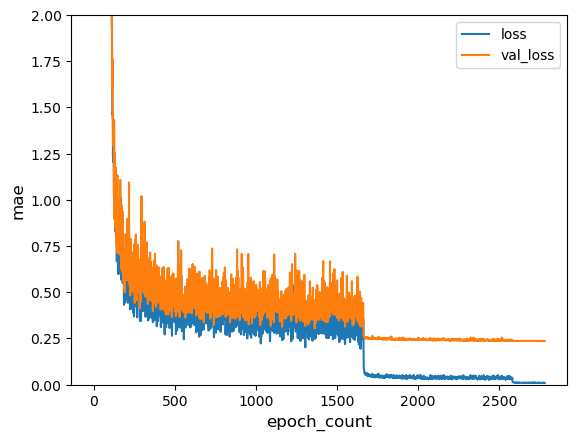

In [9]:
# Plot

h_cnn = history.history
history_df = pd.DataFrame(history.history)
ax= history_df.loc[:, ['loss', 'val_loss']].plot();
ax.set_ylim(0,2)
ax.set_xlabel(r'epoch_count',fontsize=12)
ax.set_ylabel(r'mae',fontsize=12)


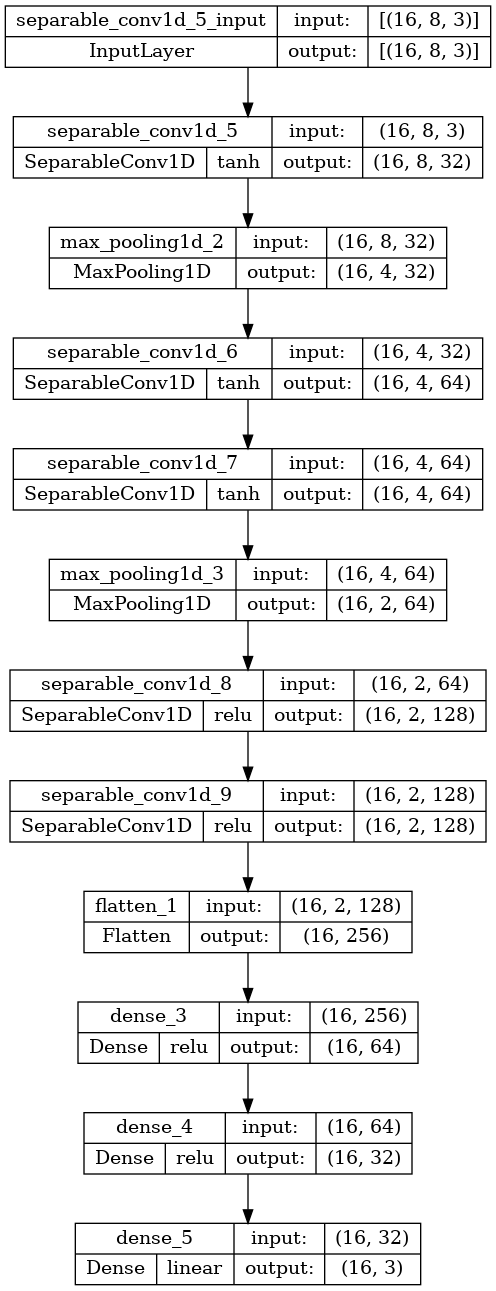

In [10]:
from keras.utils import plot_model
plot_model(model, show_shapes=True,
           to_file='model.png',show_layer_activations=True)

In [11]:
model.save('data/model.h5')